In [2]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
%matplotlib inline

C:\Users\Lenovo\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [3]:
path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
part1=pd.read_csv(path,delimiter=',')
lg=LinearRegression(fit_intercept=False)
#lg.fit(part1[['revision_time']],part1[['exam_score']])
ones=pd.Series([1 for i in range (50)])
x=pd.concat([np.transpose(ones),part1['revision_time']],axis=1)
lg.fit(x,part1['exam_score'])
lg.coef_




array([17.89768026,  1.44114091])

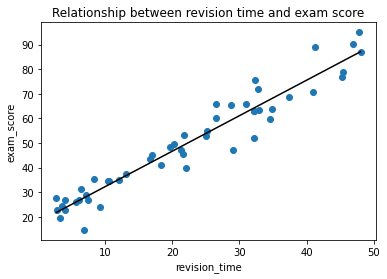

In [24]:
plt.scatter(part1['revision_time'],part1['exam_score'])
plt.plot(part1['revision_time'], list(map(lambda x:x*lg.coef_[1]+lg.coef_[0],part1['revision_time'])),color='black')
plt.xlabel('revision_time')
plt.ylabel('exam_score')
plt.title('Relationship between revision time and exam score')
plt.show()

In [5]:
x=np.array([[1,part1['revision_time'][i]] for i in range (50)])
y=np.array(part1['exam_score'])
w=np.linalg.inv((x.T).dot(x)).dot(x.T).dot(y)
w
#shape(np.transpose(part1['revision_time'].values))
# np.transpose(ones)

array([17.89768026,  1.44114091])

In [6]:
x=part1['revision_time']
y_sk=[lg.coef_[0]+lg.coef_[1]*x[i] for i in range (50)]
MSE_sk=sum([(y_sk[i]-y[i])**2 for i in range (50)])/50
MSE_sk


30.9854726145413

In [8]:
x=part1['revision_time']
y_cf=[w[0]+w[1]*x[i] for i in range (50)]
MSE_cf=sum([(y_cf[i]-y[i])**2 for i in range (50)])/50
MSE_cf

30.985472614541287

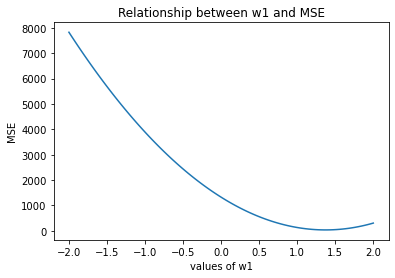

In [11]:
x=part1['revision_time']
w1=np.linspace(-2,2,100)
y_trial=[[20+x[i]*w1[j] for i in range (50)]for j in range (100)]
MSE=np.array([sum([(y_trial[j][i]-y[i])**2 for i in range (50)])/50 for j in range (100)])
plt.plot(w1,MSE)
plt.xlabel('values of w1')
plt.ylabel('MSE')
plt.title('Relationship between w1 and MSE')
plt.show()

In [14]:
print(w1[np.argwhere(MSE==min(MSE))])
min(MSE)


[[1.35353535]]


32.48096161535148

In [9]:
a=np.array([1,2,3])
a.mean()

2.0